In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision
import matplotlib.pyplot as plt

In [2]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size= 100
learning_rate = 0.001

In [3]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [4]:
# train_loader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
# test_loader = DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
# 
# 


In [5]:
exmple = iter(train_loader)
samples,labels = exmple.next()

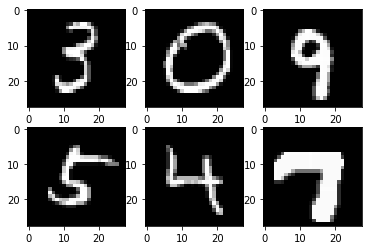

In [6]:
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.imshow(samples[i][0],cmap="gray")

In [7]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out
        
model = NeuralNet(input_size,hidden_size,num_classes)
criterion  = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [ ]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28)
        labels = labels
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

In [8]:
n_total_steps = len(train_loader)

for ep in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1,784)
        
        # forward
        outputs = model(images)
        loss = criterion(outputs,labels)
        
        #backward
        optimizer.zero_grad() 
        loss.backward()
        optimizer.step()
        
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{ep+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/5], Step [100/600], Loss: 0.2655
Epoch [1/5], Step [200/600], Loss: 0.2150
Epoch [1/5], Step [300/600], Loss: 0.1184
Epoch [1/5], Step [400/600], Loss: 0.1894
Epoch [1/5], Step [500/600], Loss: 0.1786
Epoch [1/5], Step [600/600], Loss: 0.1438
Epoch [2/5], Step [100/600], Loss: 0.1373
Epoch [2/5], Step [200/600], Loss: 0.0863
Epoch [2/5], Step [300/600], Loss: 0.0566
Epoch [2/5], Step [400/600], Loss: 0.1082
Epoch [2/5], Step [500/600], Loss: 0.0426
Epoch [2/5], Step [600/600], Loss: 0.1280
Epoch [3/5], Step [100/600], Loss: 0.0903
Epoch [3/5], Step [200/600], Loss: 0.0956
Epoch [3/5], Step [300/600], Loss: 0.0499
Epoch [3/5], Step [400/600], Loss: 0.1048
Epoch [3/5], Step [500/600], Loss: 0.0198
Epoch [3/5], Step [600/600], Loss: 0.0506
Epoch [4/5], Step [100/600], Loss: 0.0707
Epoch [4/5], Step [200/600], Loss: 0.0371
Epoch [4/5], Step [300/600], Loss: 0.0617
Epoch [4/5], Step [400/600], Loss: 0.0142
Epoch [4/5], Step [500/600], Loss: 0.0597
Epoch [4/5], Step [600/600], Loss:

In [24]:
with torch.no_grad():
    n_corrent = 0
    n_samples = 0
    
    for images,labels in test_loader:
        images = images.reshape(-1,784)
        
        outputs = model(images)
        n_corrent += (labels == torch.max(outputs,dim=1)[1]).sum().item()
        n_samples += labels.shape[0]
        
        

In [26]:
n_corrent/n_samples

0.9795